# Import packages

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Load Sales data

In [28]:
autosales = pd.read_excel('sales_data.xlsx')

autosales.head()

,Year,Month,Sales,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2015,january,35750,NaN,NaN,NaN
1,2015,february,39988,NaN,NaN,NaN
2,2015,march,40159,NaN,MAX,4.231000e+04
3,2015,april,35403,NaN,MIN,1.012300e+04
4,2015,may,35062,NaN,VARIANCE,5.336057e+07


In [30]:
autosales =  autosales[['Year','Month','Sales']]
autosales ['YearMonth'] = autosales['Month'].str.capitalize().str[:3] + "-" + autosales['Year'].astype(str).str[-2:]
autosales["Sales"] = pd.to_numeric(autosales["Sales"], errors='coerce')

autosales.loc[autosales.duplicated(subset=["YearMonth"]), 'Month'] = 'october'
autosales ['YearMonth'] = autosales['Month'].str.capitalize().str[:3] + "-" + autosales['Year'].astype(str).str[-2:]
autosales.head()

,Year,Month,Sales,YearMonth
0,2015,january,35750.0,Jan-15
1,2015,february,39988.0,Feb-15
2,2015,march,40159.0,Mar-15
3,2015,april,35403.0,Apr-15
4,2015,may,35062.0,May-15


In [32]:
autosales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       59 non-null     int64  
 1   Month      59 non-null     object 
 2   Sales      56 non-null     float64
 3   YearMonth  59 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


# Plot time series data

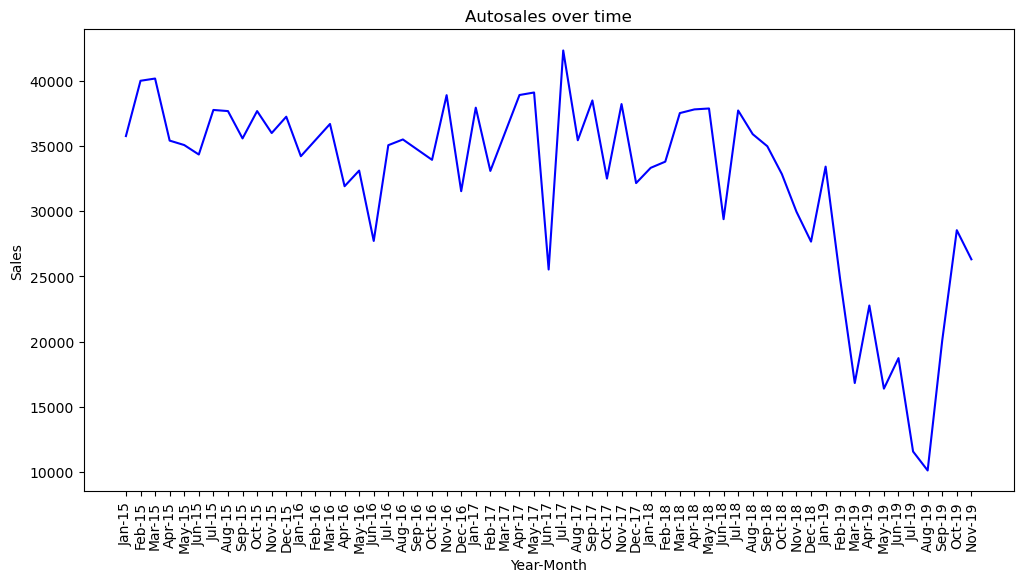

In [34]:
plt.figure(figsize = (12,6))

sns.lineplot(x= autosales['YearMonth'], y = autosales['Sales'], data = autosales, color="b")
plt.ylabel('Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=90)
plt.title('Autosales over time')

plt.show()

# Quarter data

In [36]:
quarter = { "january": "Q1", "february": "Q1", "march": "Q1", "april": "Q2", "may": "Q2", "june": "Q2",    
            "july": "Q3", "august": "Q3", "september": "Q3", "october": "Q4", "november": "Q4", "december": "Q4" }

quartersales = autosales.copy()
quartersales['Quarter'] = quartersales['Month'].map(quarter)
quartersales = quartersales[['Year','Quarter','Sales']]
quartersales = quartersales.groupby(['Year','Quarter'])['Sales'].mean().reset_index()
quartersales

,Year,Quarter,Sales
0,2015,Q1,38632.333333
1,2015,Q2,34933.666667
2,2015,Q3,36995.666667
3,2015,Q4,36960.000000
4,2016,Q1,35442.000000
5,2016,Q2,30907.666667
6,2016,Q3,35270.500000
7,2016,Q4,34780.666667
8,2017,Q1,35503.500000
9,2017,Q2,34503.333333


# Moving average model

In [40]:
movingavg = quartersales.copy()

movingavg['Moving Average'] = movingavg['Sales'].rolling(window=4).mean()
movingavg['Forecast'] = movingavg['Moving Average'].shift(1)
movingavg ['Error'] = movingavg['Forecast'] - movingavg['Sales'] 
movingavg ['AD'] = movingavg['Error'].abs()
movingavg['ErrorPerc'] = ( movingavg ['AD'] / movingavg['Sales'] ) * 100
movingavg['MAPE'] = movingavg['ErrorPerc'].expanding().mean()

movingavg 

,Year,Quarter,Sales,Moving Average,Forecast,Error,AD,ErrorPerc,MAPE
0,2015,Q1,38632.333333,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,Q2,34933.666667,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,Q3,36995.666667,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,Q4,36960.000000,36880.416667,NaN,NaN,NaN,NaN,NaN
4,2016,Q1,35442.000000,36082.833333,36880.416667,1438.416667,1438.416667,4.058509,4.058509
5,2016,Q2,30907.666667,35076.333333,36082.833333,5175.166667,5175.166667,16.743958,10.401233
6,2016,Q3,35270.500000,34645.041667,35076.333333,-194.166667,194.166667,0.550507,7.117658
7,2016,Q4,34780.666667,34100.208333,34645.041667,-135.625000,135.625000,0.389944,5.435729
8,2017,Q1,35503.500000,34115.583333,34100.208333,-1403.291667,1403.291667,3.952545,5.139092
9,2017,Q2,34503.333333,35014.500000,34115.583333,-387.750000,387.750000,1.123804,4.469878


In [42]:
print(f"MAPE of the moving average model is {movingavg.iloc[-1,-1]}")

MAPE of the moving average model is 17.558464041022752


# Exponential Smoothing model

In [44]:
Level = movingavg['Sales'].mean()
alpha = 0.2

exposmoothing = quartersales.copy()
exposmoothing['Level'] = np.NaN

for i in range(len(exposmoothing)):
    exposmoothing.iloc[i, 3] = Level
    Level = (alpha*exposmoothing.iloc[i, 2]) + ((1-alpha)*Level)

exposmoothing['Forecast'] = exposmoothing['Level'].shift(1)
exposmoothing['Error'] = (exposmoothing['Forecast'] - exposmoothing['Sales'])
exposmoothing['AD'] = exposmoothing['Error'].abs()
exposmoothing['ErrorPerc'] = (exposmoothing['AD']/exposmoothing['Sales'])*100
exposmoothing['MAPE'] = exposmoothing['ErrorPerc'].expanding().mean()
exposmoothing

,Year,Quarter,Sales,Level,Forecast,Error,AD,ErrorPerc,MAPE
0,2015,Q1,38632.333333,32440.891667,NaN,NaN,NaN,NaN,NaN
1,2015,Q2,34933.666667,33679.180000,32440.891667,-2492.775000,2492.775000,7.135738,7.135738
2,2015,Q3,36995.666667,33930.077333,33679.180000,-3316.486667,3316.486667,8.964527,8.050133
3,2015,Q4,36960.000000,34543.195200,33930.077333,-3029.922667,3029.922667,8.197843,8.099369
4,2016,Q1,35442.000000,35026.556160,34543.195200,-898.804800,898.804800,2.535988,6.708524
5,2016,Q2,30907.666667,35109.644928,35026.556160,4118.889493,4118.889493,13.326433,8.032106
6,2016,Q3,35270.500000,34269.249276,35109.644928,-160.855072,160.855072,0.456061,6.769432
7,2016,Q4,34780.666667,34469.499421,34269.249276,-511.417391,511.417391,1.470407,6.012428
8,2017,Q1,35503.500000,34531.732870,34469.499421,-1034.000579,1034.000579,2.912391,5.624923
9,2017,Q2,34503.333333,34726.086296,34531.732870,28.399536,28.399536,0.082310,5.009078


In [46]:
print(f"MAPE of the exponential model is {exposmoothing.iloc[-1,-1]}")

MAPE of the exponential model is 17.86256994971548


# Static Model

In [48]:
static = quartersales.copy()
static['Deseasonalized demand'] = ( 2 * ( static['Sales'] + static['Sales'].shift(1) + static['Sales'].shift(-1) ) + 
( static['Sales'].shift(2) + static['Sales'].shift(-2) ) ) / 8
static.reset_index(inplace=True)
static

,index,Year,Quarter,Sales,Deseasonalized demand
0,0,2015,Q1,38632.333333,NaN
1,1,2015,Q2,34933.666667,NaN
2,2,2015,Q3,36995.666667,36481.625000
3,3,2015,Q4,36960.000000,35579.583333
4,4,2016,Q1,35442.000000,34860.687500
5,5,2016,Q2,30907.666667,34372.625000
6,6,2016,Q3,35270.500000,34107.895833
7,7,2016,Q4,34780.666667,34565.041667
8,8,2017,Q1,35503.500000,35448.062500
9,9,2017,Q2,34503.333333,35819.041667


In [50]:
regdata = static[static['Deseasonalized demand'].isna() == False]
X = sm.add_constant(regdata['index'])
static_model = sm.OLS(regdata[['Deseasonalized demand']], X).fit()

staticlevel = static_model.params[0]  # Intercept
statictrend = static_model.params[1] 

print(f"The intercept is {staticlevel}, and slope is {statictrend}")

The intercept is 39146.0323529412, and slope is -623.084957107843


C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3043637192.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  staticlevel = static_model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3043637192.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  statictrend = static_model.params[1]


In [54]:
static['Deseason'] = ( staticlevel + statictrend * static['index'])
static['Seasonality factor'] = static['Deseason'] / static['Sales']

avgseasonfactor = static.groupby('Quarter')['Seasonality factor'].mean()

static['avgseasonfactor'] = static['Quarter'].apply(lambda x : avgseasonfactor[x] )
static['Forecast'] = static['Deseason'] * ( static['avgseasonfactor'] ) 
static['Error'] = (static['Forecast'] - static['Sales'])
static['AD'] = static['Error'].abs()
static['ErrorPerc'] = (static['AD']/static['Sales'])*100
static['MAPE'] = static['ErrorPerc'].expanding().mean()

static

,index,Year,Quarter,Sales,Deseasonalized demand,Deseason,Seasonality factor,avgseasonfactor,Forecast,Error,AD,ErrorPerc,MAPE
0,0,2015,Q1,38632.333333,NaN,39146.032353,1.013297,1.017026,39812.552141,1180.218807,1180.218807,3.055003,3.055003
1,1,2015,Q2,34933.666667,NaN,38522.947396,1.102746,1.121372,43198.568514,8264.901847,8264.901847,23.658844,13.356924
2,2,2015,Q3,36995.666667,36481.625000,37899.862439,1.024441,1.144778,43386.911464,6391.244797,6391.244797,17.275658,14.663168
3,3,2015,Q4,36960.000000,35579.583333,37276.777482,1.008571,0.986982,36791.524346,-168.475654,168.475654,0.455832,11.111334
4,4,2016,Q1,35442.000000,34860.687500,36653.692525,1.034188,1.017026,37277.776497,1835.776497,1835.776497,5.179664,9.925000
5,5,2016,Q2,30907.666667,34372.625000,36030.607567,1.165750,1.121372,40403.727513,9496.060847,9496.060847,30.723966,13.391494
6,6,2016,Q3,35270.500000,34107.895833,35407.522610,1.003885,1.144778,40533.736795,5263.236795,5263.236795,14.922490,13.610208
7,7,2016,Q4,34780.666667,34565.041667,34784.437653,1.000108,0.986982,34331.628730,-449.037936,449.037936,1.291056,12.070314
8,8,2017,Q1,35503.500000,35448.062500,34161.352696,0.962197,1.017026,34743.000852,-760.499148,760.499148,2.142040,10.967173
9,9,2017,Q2,34503.333333,35819.041667,33538.267739,0.972030,1.121372,37608.886513,3105.553180,3105.553180,9.000734,10.770529


In [56]:
print(f"MAPE of the static model is {static.iloc[-1,-1]}")

MAPE of the static model is 17.390174630231723


# Holt model

In [58]:
holt = quartersales.copy()
holt.reset_index(inplace=True)

X = sm.add_constant(holt['index'])
model = sm.OLS(holt[['Sales']], X).fit()

holtlevel = model.params[0]  # Intercept
holttrend = model.params[1] 

print(f"The level is {holtlevel}, and trend is {holttrend}")

The level is 39601.92857142855, and trend is -753.7933583959888


C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3666183927.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  holtlevel = model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3666183927.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  holttrend = model.params[1]


In [60]:
alpha = 0.1
beta = 0.2

holt['Level'] = np.NaN
holt['Trend'] = np.NaN

holtlevel = model.params[0]  # Intercept
holttrend = model.params[1] 

for i in range(len(holt)):
    holt.iloc[i, 4] = (alpha*holt.iloc[i, 3]) + ( (1-alpha)* ( holtlevel + holttrend ) ) 
    holt.iloc[i, 5] = ( ( beta* ( holt.iloc[i, 4] - holtlevel )  )+ ( (1-beta) * holttrend )  )
    holtlevel = holt.iloc[i, 4]
    holttrend = holt.iloc[i, 5]

holt['Forecast'] = holt['Level'] + holt['Trend'] 
holt['Error'] = (holt['Forecast'] - holt['Sales'])
holt['AD'] = holt['Error'].abs()
holt['ErrorPerc'] = (holt['AD']/holt['Sales'])*100
holt['MAPE'] = holt['ErrorPerc'].expanding().mean()

holt

C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3092335568.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  holtlevel = model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3092335568.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  holttrend = model.params[1]


,index,Year,Quarter,Sales,Level,Trend,Forecast,Error,AD,ErrorPerc,MAPE
0,0,2015,Q1,38632.333333,38826.555025,-758.109396,38068.445629,-563.887704,563.887704,1.459626,1.459626
1,1,2015,Q2,34933.666667,37754.967733,-820.804975,36934.162758,2000.496091,2000.496091,5.726556,3.593091
2,2,2015,Q3,36995.666667,36940.313149,-819.574897,36120.738251,-874.928415,874.928415,2.364948,3.183710
3,3,2015,Q4,36960.000000,36204.664426,-802.789662,35401.874764,-1558.125236,1558.125236,4.215707,3.441709
4,4,2016,Q1,35442.000000,35405.887288,-801.987157,34603.900130,-838.099870,838.099870,2.364708,3.226309
5,5,2016,Q2,30907.666667,34234.276784,-875.911827,33358.364957,2450.698291,2450.698291,7.929095,4.010107
6,6,2016,Q3,35270.500000,33549.578462,-837.669126,32711.909336,-2558.590664,2558.590664,7.254194,4.473548
7,7,2016,Q4,34780.666667,32918.785069,-796.293979,32122.491090,-2658.175577,2658.175577,7.642681,4.869690
8,8,2017,Q1,35503.500000,32460.591981,-728.673801,31731.918180,-3771.581820,3771.581820,10.623127,5.508960
9,9,2017,Q2,34503.333333,32009.059695,-673.245498,31335.814197,-3167.519136,3167.519136,9.180328,5.876097


In [62]:
print(f"MAPE of the holt model is {holt.iloc[-1,-1]}")

MAPE of the holt model is 14.317831225740496


# Winter Model

In [64]:
alpha = 0.1
beta = 0.2
gamma = 0.1

winterlevel = static_model.params[0]  # Intercept
wintertrend = static_model.params[1] 

winter = static[['index','Year','Quarter','Sales','Deseasonalized demand','avgseasonfactor']].copy()
winter['Level'] = np.NaN
winter['Trend'] = np.NaN

#0 : index, 1 : year, 2:quarter, 3: sales, 4: deseasonalized demand, 5: season factor, 6: level, 7: trend
for i in range(len(winter)):
    winter.iloc[i,6] = ( alpha * ( winter.iloc[i,3] / winter.iloc[i,5] ) ) + ( ( 1- alpha ) * ( winterlevel + wintertrend ) )
    #level = ( alpha * (sales / seasonality) )  + ( (1-alpha) * (level (t-1) + trend (t-1)) ) 
    winter.iloc[i,7] = ( beta * ( winter.iloc[i,6] - winterlevel ) ) + ( ( 1- beta ) * wintertrend  )
    #trend = ( beta * (level - level(t-1) ) )  + ( (1-beta) * trend (t-1))
    try:
        winter.iloc[i+4,5] = ( gamma * ( winter.iloc[i,3] / winter.iloc[i,6] ) ) + ( ( 1 - gamma ) * winter.iloc[i+4,5] )
    #seasonality = ( gamma * ( sales (t-4) / level (t-4) ) ) + ( ( 1- gamma ) * seasonality (t-4) )
    except IndexError:
        continue
    winterlevel = winter.iloc[i,6]
    wintertrend = winter.iloc[i,7]

winter['Forecast'] = ( winter['Level'] + winter['Trend'] ) * winter['avgseasonfactor']
winter['Error'] = (winter['Forecast'] - winter['Sales'])
winter['AD'] = winter['Error'].abs()
winter['ErrorPerc'] = (winter['AD']/winter['Sales'])*100
winter['MAPE'] = winter['ErrorPerc'].expanding().mean()
winter

C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3237984336.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  winterlevel = static_model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3237984336.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  wintertrend = static_model.params[1]


,index,Year,Quarter,Sales,Deseasonalized demand,avgseasonfactor,Level,Trend,Forecast,Error,AD,ErrorPerc,MAPE
0,0,2015,Q1,38632.333333,NaN,1.017026,38469.209868,-633.832463,38479.581331,-152.752002,152.752002,0.395399,0.395399
1,1,2015,Q2,34933.666667,NaN,1.121372,37167.099845,-767.487975,40817.518740,5883.852074,5883.852074,16.842927,8.619163
2,2,2015,Q3,36995.666667,36481.625000,1.144778,35991.341141,-849.142121,40230.000306,3234.333640,3234.333640,8.742466,8.660264
3,3,2015,Q4,36960.000000,35579.583333,0.986982,35372.726639,-803.036597,34119.676611,-2840.323389,2840.323389,7.684858,8.416413
4,4,2016,Q1,35442.000000,34860.687500,1.015748,34601.972709,-796.580063,34337.756027,-1104.243973,1104.243973,3.115637,7.356257
5,5,2016,Q2,30907.666667,34372.625000,1.103226,33226.425119,-912.373569,35649.700499,4742.033832,4742.033832,15.342581,8.687311
6,6,2016,Q3,35270.500000,34107.895833,1.133090,32195.416968,-936.100485,35419.626867,149.126867,149.126867,0.422809,7.506668
7,7,2016,Q4,34780.666667,34565.041667,0.992771,31636.775885,-860.608605,30553.700689,-4226.965978,4226.965978,12.153206,8.087485
8,8,2017,Q1,35503.500000,35448.062500,1.017752,31186.975658,-778.446929,30948.326733,-4555.173267,4555.173267,12.830209,8.614455
9,9,2017,Q2,34503.333333,35819.041667,1.102256,30497.921341,-760.568407,32778.189619,-1725.143714,1725.143714,4.999933,8.253003


In [66]:
print(f"MAPE of the winter model is {winter.iloc[-1,-1]}")

MAPE of the winter model is 16.661429750048388


# Regression Modelling - independent var is GDP

In [68]:
gdp = pd.read_csv('gdp_data.csv',header=0,index_col=False)
gdp = pd.melt(gdp, id_vars = 'Year', value_vars = ['1','2','3','4'] ,var_name = 'Quarter', value_name = 'gdp_rate')
gdp['Year'] = gdp['Year'].astype(str).apply(lambda x : x.split('-')[0])
gdp['Quarter'] = 'Q' + gdp['Quarter'].astype(str)
gdp.head()

,Year,Quarter,gdp_rate
0,2015,Q1,11.29
1,2016,Q1,12.22
2,2017,Q1,10.10
3,2018,Q1,13.57
4,2019,Q1,8.06


In [72]:
quartersales['Year'] = quartersales['Year'].astype(str)
quartersales['Quarter'] = quartersales['Quarter'].astype(str)

gdp_regdata = pd.merge(quartersales,gdp, on = ['Year','Quarter'], how = 'left')
gdp_regdata.reset_index(inplace = True)
gdp_regdata.head()

,index,Year,Quarter,Sales,gdp_rate
0,0,2015,Q1,38632.333333,11.29
1,1,2015,Q2,34933.666667,9.89
2,2,2015,Q3,36995.666667,9.16
3,3,2015,Q4,36960.000000,11.50
4,4,2016,Q1,35442.000000,12.22


In [78]:
X = sm.add_constant(gdp_regdata['gdp_rate'])
gdp_reg_model = sm.OLS(gdp_regdata[['Sales']], X).fit()

gdp_reg_level = gdp_reg_model.params[0]  # Intercept
gdp_reg_trend = gdp_reg_model.params[1] 

print(f"The intercept is {gdp_reg_level}, and slope is {gdp_reg_trend}")

The intercept is 6834.753204039335, and slope is 2482.65837333986


C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3476833091.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gdp_reg_level = gdp_reg_model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\3476833091.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gdp_reg_trend = gdp_reg_model.params[1]


In [82]:
gdp_regdata['Forecast'] = ( gdp_reg_level + ( gdp_reg_trend * gdp_regdata['gdp_rate'] ) ) 
gdp_regdata['Error'] = (gdp_regdata['Forecast'] - gdp_regdata['Sales'])
gdp_regdata['AD'] = gdp_regdata['Error'].abs()
gdp_regdata['ErrorPerc'] = (gdp_regdata['AD']/gdp_regdata['Sales'])*100
gdp_regdata['MAPE'] = gdp_regdata['ErrorPerc'].expanding().mean()
gdp_regdata.head()

,index,Year,Quarter,Sales,gdp_rate,Forecast,Error,AD,ErrorPerc,MAPE
0,0,2015,Q1,38632.333333,11.29,34863.966239,-3768.367094,3768.367094,9.754438,9.754438
1,1,2015,Q2,34933.666667,9.89,31388.244516,-3545.422150,3545.422150,10.149012,9.951725
2,2,2015,Q3,36995.666667,9.16,29575.903904,-7419.762763,7419.762763,20.055762,13.319737
3,3,2015,Q4,36960.000000,11.50,35385.324497,-1574.675503,1574.675503,4.260486,11.054925
4,4,2016,Q1,35442.000000,12.22,37172.838526,1730.838526,1730.838526,4.883580,9.820656


In [84]:
print(f"MAPE of the regression model (with GDP as the independent var) is {gdp_regdata.iloc[-1,-1]}")

MAPE of the regression model (with GDP as the independent var) is 11.36684427745384


# Regression Model - independent variable is interest rate

In [188]:
int = pd.read_csv('rates_data.csv',header=0,index_col=False)
int = int[['Year','Quarter','Rate']]

int[['Year','Quarter']] = int[['Year','Quarter']].astype(str) 
int['Quarter'] = 'Q' + int['Quarter']
int.head()

,Year,Quarter,Rate
0,2015,Q1,0.07625
1,2015,Q2,0.07250
2,2015,Q3,0.06750
3,2015,Q4,0.06750
4,2016,Q1,0.06500


In [198]:
quartersales['Year'] = quartersales['Year'].astype(str)
quartersales['Quarter'] = quartersales['Quarter'].astype(str)

int_regdata = pd.merge(quartersales,int, on = ['Year','Quarter'], how = 'left')
int_regdata.reset_index(inplace = True)

int_regdata.sort_values(by=['Year','Quarter'],inplace=True)
int_regdata.dropna(subset=['Rate'],inplace=True)
int_regdata.head()

,index,Year,Quarter,Sales,Rate
0,0,2015,Q1,38632.333333,0.07625
1,1,2015,Q2,34933.666667,0.07250
2,2,2015,Q3,36995.666667,0.06750
3,3,2015,Q4,36960.000000,0.06750
4,4,2016,Q1,35442.000000,0.06500


In [196]:
X = sm.add_constant(int_regdata['Rate'])
int_reg_model = sm.OLS(int_regdata[['Sales']], X).fit()

int_reg_level = int_reg_model.params[0]  # Intercept
int_reg_trend = int_reg_model.params[1] 

print(f"The intercept is {int_reg_level}, and slope is {int_reg_trend}")

The intercept is 9826.501743375236, and slope is 372000.8368200827


C:\Users\prana\AppData\Local\Temp\ipykernel_21288\360668902.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_reg_level = int_reg_model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\360668902.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_reg_trend = int_reg_model.params[1]


In [200]:
int_regdata['Forecast'] = ( int_reg_level + ( int_reg_trend * int_regdata['Rate'] ) ) 
int_regdata['Error'] = (int_regdata['Forecast'] - int_regdata['Sales'])
int_regdata['AD'] = int_regdata['Error'].abs()
int_regdata['ErrorPerc'] = (int_regdata['AD']/int_regdata['Sales'])*100
int_regdata['MAPE'] = int_regdata['ErrorPerc'].expanding().mean()
int_regdata.head()

,index,Year,Quarter,Sales,Rate,Forecast,Error,AD,ErrorPerc,MAPE
0,0,2015,Q1,38632.333333,0.07625,38191.565551,-440.767782,440.767782,1.140930,1.140930
1,1,2015,Q2,34933.666667,0.07250,36796.562413,1862.895746,1862.895746,5.332666,3.236798
2,2,2015,Q3,36995.666667,0.06750,34936.558229,-2059.108438,2059.108438,5.565810,4.013135
3,3,2015,Q4,36960.000000,0.06750,34936.558229,-2023.441771,2023.441771,5.474680,4.378521
4,4,2016,Q1,35442.000000,0.06500,34006.556137,-1435.443863,1435.443863,4.050121,4.312841


In [202]:
print(f"MAPE of the regression model (with interest rate as the independent var) is {int_regdata.iloc[-1,-1]}")

MAPE of the regression model (with interest rate as the independent var) is 11.630104725488211


In [216]:
multi_reg_data = pd.merge(gdp_regdata,int, on = ['Year','Quarter'], how = 'left')[['index','Year','Quarter','Sales','gdp_rate','Rate']]

multi_reg_data.sort_values(by=['Year','Quarter'],inplace=True)
multi_reg_data.dropna(subset=['Rate'],inplace=True)
multi_reg_data.head()

,index,Year,Quarter,Sales,gdp_rate,Rate
0,0,2015,Q1,38632.333333,11.29,0.07625
1,1,2015,Q2,34933.666667,9.89,0.07250
2,2,2015,Q3,36995.666667,9.16,0.06750
3,3,2015,Q4,36960.000000,11.50,0.06750
4,4,2016,Q1,35442.000000,12.22,0.06500


In [224]:
X = sm.add_constant(multi_reg_data[['Rate','gdp_rate']])
multi_reg_model = sm.OLS(multi_reg_data[['Sales']], X).fit()

multi_reg_level = multi_reg_model.params[0]  # Intercept
int_trend = multi_reg_model.params[1]
gdp_trend = multi_reg_model.params[2]

print(f"The intercept is {multi_reg_level}, and slope for interest rate is {int_trend} while the slope for GDP rate is {gdp_trend}.")

The intercept is -11052.765661066696, and slope for interest rate is 373024.7825630039 while the slope for GDP rate is 1957.7842604647594.


C:\Users\prana\AppData\Local\Temp\ipykernel_21288\1816234558.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multi_reg_level = multi_reg_model.params[0]  # Intercept
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\1816234558.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  int_trend = multi_reg_model.params[1]
C:\Users\prana\AppData\Local\Temp\ipykernel_21288\1816234558.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gd

In [226]:
multi_reg_data['Forecast'] = ( multi_reg_level + ( int_trend * multi_reg_data['Rate'] ) + ( gdp_trend * multi_reg_data['gdp_rate'] ) ) 
multi_reg_data['Error'] = (multi_reg_data['Forecast'] - multi_reg_data['Sales'])
multi_reg_data['AD'] = multi_reg_data['Error'].abs()
multi_reg_data['ErrorPerc'] = (multi_reg_data['AD']/multi_reg_data['Sales'])*100
multi_reg_data['MAPE'] = multi_reg_data['ErrorPerc'].expanding().mean()
multi_reg_data.head()

,index,Year,Quarter,Sales,gdp_rate,Rate,Forecast,Error,AD,ErrorPerc,MAPE
0,0,2015,Q1,38632.333333,11.29,0.07625,39493.758310,861.424977,861.424977,2.229803,2.229803
1,1,2015,Q2,34933.666667,9.89,0.07250,35354.017411,420.350744,420.350744,1.203283,1.716543
2,2,2015,Q3,36995.666667,9.16,0.06750,32059.710988,-4935.955679,4935.955679,13.341983,5.591690
3,3,2015,Q4,36960.000000,11.50,0.06750,36640.926157,-319.073843,319.073843,0.863295,4.409591
4,4,2016,Q1,35442.000000,12.22,0.06500,37117.968868,1675.968868,1675.968868,4.728765,4.473426


In [228]:
print(f"MAPE of the multiple regression model is {multi_reg_data.iloc[-1,-1]}")

MAPE of the multiple regression model is 6.431844715620792


In [250]:
dict = {'Moving Average':movingavg.iloc[-1,-1],'Exponential Smoothing':exposmoothing.iloc[-1,-1],
       'Static':static.iloc[-1,-1], 'Holt' : holt.iloc[-1,-1], 'Winter':winter.iloc[-1,-1],
       'Regression with GDP': gdp_regdata.iloc[-1,-1], 'Regression with Interest Rates' : int_regdata.iloc[-1,-1],
       'Multi-Regression':multi_reg_data.iloc[-1,-1]}
final_mape_values = pd.DataFrame(list(dict.items()), columns=['Model', 'MAPE'])
final_mape_values

,Model,MAPE
0,Moving Average,17.558464
1,Exponential Smoothing,17.862570
2,Static,17.390175
3,Holt,14.317831
4,Winter,16.661430
5,Regression with GDP,11.366844
6,Regression with Interest Rates,11.630105
7,Multi-Regression,6.431845


In [276]:
best_model = final_mape_values.loc[final_mape_values['MAPE']==final_mape_values['MAPE'].min(),'Model'].item()
best_accuracy = final_mape_values.loc[final_mape_values['MAPE']==final_mape_values['MAPE'].min(),'MAPE'].item()

print(f"The Model with the best accuracy is the {best_model} with accuracy of {round(best_accuracy,2)}")

The Model with the best accuracy is the Multi-Regression with accuracy of 6.43
